<a href="https://colab.research.google.com/github/ajuRavi/Machine-Learning_Case-Study/blob/master/sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google import colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks/nb"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
enron  sol.ipynb


In [0]:
cd /content/drive/My Drive/Colab Notebooks/nb

/content/drive/My Drive/Colab Notebooks/nb


In [0]:
import os
import re
import string
import math

DATA_DIR = 'enron'
target_names = ['ham', 'spam']

def get_data(DATA_DIR):
	subfolders = ['enron%d' % i for i in [1]]

	data = []
	target = []
	for subfolder in subfolders:
		# spam
		spam_files = os.listdir(os.path.join(DATA_DIR, subfolder, 'spam'))
		for spam_file in spam_files:
			with open(os.path.join(DATA_DIR, subfolder, 'spam', spam_file), encoding="latin-1") as f:
				data.append(f.read())
				target.append(1)

		# ham
		ham_files = os.listdir(os.path.join(DATA_DIR, subfolder, 'ham'))
		for ham_file in ham_files:
			with open(os.path.join(DATA_DIR, subfolder, 'ham', ham_file), encoding="latin-1") as f:
				data.append(f.read())
				target.append(0)
	return data, target


In [0]:

if __name__ == '__main__':
    X, y = get_data(DATA_DIR)


In [0]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
nltk.download('stopwords')
from nltk.corpus import stopwords

#creation of csv
#data=pd.DataFrame()
#for i in X:
#    data.append(i)
    
#data=pd.read_csv('data.csv')
corpus=[]
for i in X:
    sent=i
    sent=re.sub('[^a-z A-z]',' ',sent)
    sent=sent.lower()
    sent=sent.split()
    ps=PorterStemmer()
    sent=[ps.stem(word) for word in sent if word not in set(stopwords.words('english'))]
    review=' '.join(sent)
    corpus.append(review)

#using tfid
#next try without corpus...or directly put into tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words=None, max_features=100000,ngram_range=(1,2))
corpus_tv = tv.fit_transform(corpus)
features=corpus_tv.todense()

from sklearn.model_selection import cross_val_score,KFold
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

#split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,y,random_state=100,shuffle=True)
print(len(y_train),x_train.shape)

#rf
# from sklearn.ensemble import RandomForestClassifier as rfc
# rf=rfc(n_estimators=100,verbose=1)
# rf.fit(x_train,y_train)
# y_pred=rf.predict(x_test)
# print(accuracy_score(y_test,y_pred))

#nb
from sklearn.metrics import accuracy_score
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
print(accuracy_score(y_test,y_pred_nb))

from sklearn.metrics import confusion_matrix as cm
cm(y_test,y_pred_nb)

from sklearn.metrics import precision_recall_fscore_support as prec

prec(y_test,y_pred_nb,average='weighted')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
1391 (1391, 100000)
0.9762931034482759


(0.9760961904279631, 0.9762931034482759, 0.9761268956943152, None)

In [0]:
from sklearn.metrics import classification_report as cr
crc=cr(y_test,y_pred_nb)


In [0]:
print(crc)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       379
           1       0.92      0.84      0.88        85

    accuracy                           0.96       464
   macro avg       0.94      0.91      0.93       464
weighted avg       0.96      0.96      0.96       464



In [0]:
corpus[:5]

['subject lone womenn area click remov',
 'subject prozac med million peopl reli wonder drug get prozac relax enjoy life wish receiv email pleas click honor unsubscrib request immediatli',
 'subject coca cola mbna america nascar partner otcbb imt stock profil compani invest highlight press releas indianapoli race car simul ink sale eight simul instal moscow indianapoli nascar silicon motor speedway simul go intern indianapoli nascar silicon motor speedway expand monterey california fame canneri row indianapoli nascar silicon motor speedway announc custom upgrad world realist race simul indianapoli race car simul baldacci sign agreement develop intern market new gener race simulutor indianapoli imt form new subsidiari manufactur sale race car simul indianapoli nascar silicon motor speedway renew licens agreement speedway motorsport inc race track simul indianapoli nascar silicon motor speedway int speedway corp renew licens agreement race track simul indianapoli nascar silicon motor spe

In [0]:
y[:5]

[1, 1, 1, 1, 1]

In [0]:
corpus[-5:]

['subject storag deal juli cut deal go forward forward messag tommi yanowski let know problem thank kari forward kari hast hou ect enron technolog tommi j yanowski kari hast hou ect ect cc juli meyer hou ect ect subject storag deal kari deal number good deal deal number interrupt storag deal contract interrupt contract storag deal firm storag deal sinc agre firm contract would probabl cut deal go forward tommi kari hast pm tommi j yanowski hou ect ect juli meyer hou ect ect cc subject storag deal tommi two storag deal use contract number juli meyer believ deal correct deal want check first sinc put deal let know look need cut kill deal thank kari deal contract',
 'subject hpl nom march see attach file hplo xl hplo xl',
 'subject new pan energi exchang deal meet daren pleas let know time meet megan new exchang deal prior settl feb product issu need clarifi sale suppli side thank katherin',
 'subject natur ga nomin enron methanol nomin follow natur ga requir methanol plant april mmbtu pe

In [0]:
y[-5:]

[0, 0, 0, 0, 0]

In [0]:
# k -means

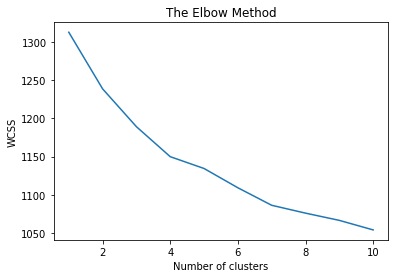

In [0]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [0]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(x_train)
y_kmeans =kmeans.predict(x_train)  

In [0]:
print(accuracy_score(y_train,y_kmeans))
from sklearn.metrics import confusion_matrix as cm
cm(y_train,y_kmeans)


0.6333572969086988


array([[881, 273],
       [237,   0]])